# Project 1 - March 31

$^{87}$Rb 
* Characteristic dimension of trap: $a_{ho} = (\hbar/m\omega_{\perp})^{1/2} = 1-2\cdot 10^4$ Å
* Scattering range: $a_{Rb}=100a_0 (50a_0<a_{Rb}<140a_0 $, where $a_0 = 0.5292$ Å is the Bohr radius)
* Atom to trap size ratio: $a_{Rb}/a_{ho}=4.33\cdot 10^{-3}$
* Density in trap: $n\simeq 10^{12} - 10^{14}$ atoms/cm$^3$
* Interatomic spacing: $l\simeq10^{4}$ Å 
* Atom is small compared to trap size and interatomic spacing

## Oppgave b)

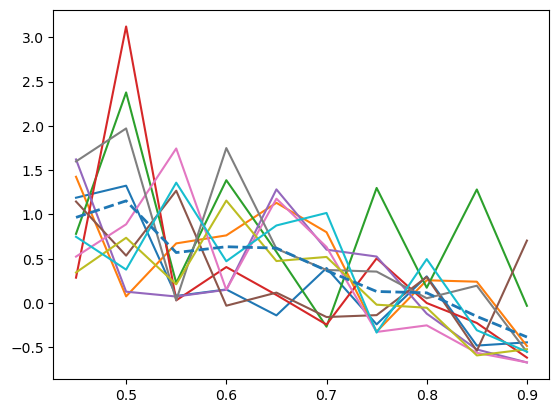

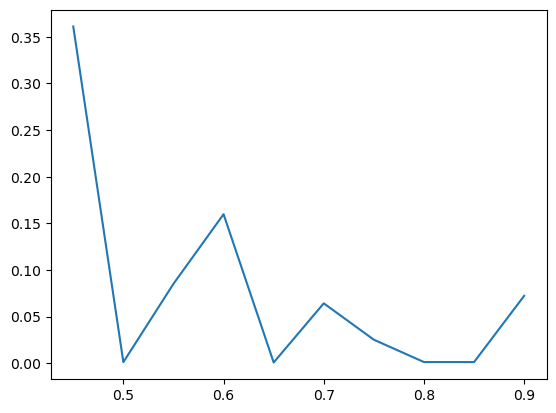

In [7]:
import numpy as np
from math import exp, sqrt
from random import random, seed
import matplotlib.pyplot as plt

def f(a, r_ij):
    if r_ij > a:
        return 1-a/r_ij
    else:
        return 0

def g(alpha, beta, r_i):
    x_i = r_i[0]
    if len(r_i) == 3:
        y_i = r_i[1]
        z_i = r_i[2]
    elif len(r_i) == 2:
        y_i = r_i[1]
        z_i = 0
    else:
        y_i = 0
        z_i = 0
    return exp(-alpha*(x_i**2+y_i**2+beta*z_i**2))

def Psi_1D(r, alpha):
    factor1 = 1
    factor2 = 1
    for i in range(N):
        factor1 *= g(alpha, 1, r[i])
    for i in range(N):
        for j in range(i+1, N):
            r_ij = abs(r[i][0]-r[j][0])
            factor2 *= f(0, r_ij)
    return factor1*factor2

def E_L2(r, a):
    E_L = 0
    for i in range(N):
        r2 = r[0, 0]**2
        r = r[0, 0]
        deno = 1.0/(1+r)
        deno2 = deno*deno
    return 0.5*(1-a*a)*(r) +2.0*a + 1.0/r+deno2*(a*r-deno2+2*deno-1.0/r)

def E_L(r, a):
    #return 0.5*(a**2+r[0,0]**2*(1-a**4))
    return a+0.5*r[0,0]**2-2*a**2

def MonteCarlo():
    n_MCC=10000
    step_size = 1.0 # educated guess? standard?
    pos_old = np.zeros((N, dimension), np.double)
    pos_new = np.zeros((N, dimension), np.double)
    
    seed()
    
    a = 0.4 #how do one set initial alpha and beta and determine the step
    for ia in range(max_var):
        a += 0.05 # change this?
        alpha[ia] = a
        energy = 0
        energy2 = 0
        deltaE = 0
        
        # place the particles randomly
        for i in range(N):
            for j in range(dimension):
                pos_old[i, j] = step_size*(random()-0.5)
        psi_old = Psi_1D(pos_old, a)
        
        for MCC in range(n_MCC):
            # create a trial for new position
            for i in range(N):
                for j in range(dimension):
                    pos_new[i, j] = pos_old[i, j] + step_size*(random()-0.5)
            psi_new = Psi_1D(pos_new, a)
            
            #Metropolis test
            if random() < psi_new**2/psi_old**2:
                pos_old = pos_new
                psi_old = psi_new
                deltaE = E_L(pos_old, a)
            energy += deltaE
            energy2 += deltaE**2
        
        energy /= n_MCC
        energy2 /= n_MCC
        variance = energy2 - energy**2
        error = np.sqrt(variance/n_MCC)
        Energies[ia] = energy   
        Variances[ia] = variance 
    return Energies, alpha
        
    
    
N = 2
dimension = 1
max_var = 10
alpha = np.zeros(max_var)
Energies = np.zeros(max_var)
Variances = np.zeros(max_var)

E_mean=[]
for i in range(max_var):
    E_mean.append(0)

k=10
for i in range(k):
    Energies, alpha = MonteCarlo()
    for j in range(max_var):
        E_mean[j] += Energies[j]/k
    #print(E_mean-Energies)
    plt.plot(alpha, Energies)
plt.plot(alpha, E_mean, linestyle='dashed', linewidth = 2)   
#plt.plot(alpha, 0.25*(alpha**2+1./alpha**2), linestyle='dashed', linewidth = 2) 
#plt.plot(alpha, 0.5*(alpha+1./(4*alpha)), linestyle='dashed', linewidth = 2)  
plt.show()

#print(0.5*(alpha+1./(4*alpha)))
plt.plot(alpha, Variances)
plt.show()